In [9]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original


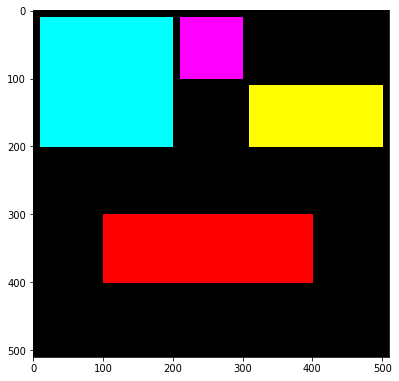

In [10]:
# Lets create our image
image_data = np.zeros((510,510,3), np.uint8)

cv2.rectangle(image_data, (10,10), (200,200), (255,255,0), -1)
cv2.rectangle(image_data, (210,10), (300,100), (255,0,255), -1)
cv2.rectangle(image_data, (310,110), (500,200), (0,255,255), -1)
cv2.rectangle(image_data, (100, 300), (400, 400), (0,0,255), -1)

cv2.imshow("Original", image_data)

In order to get the contours of an image we are going to be performing edge detection first. So, we want to work on a single channel.

In [11]:
work_image = None
gray = cv2.cvtColor(image_data,cv2.COLOR_BGR2GRAY)
ret, work_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)

Showing Image: Image we'll be working with


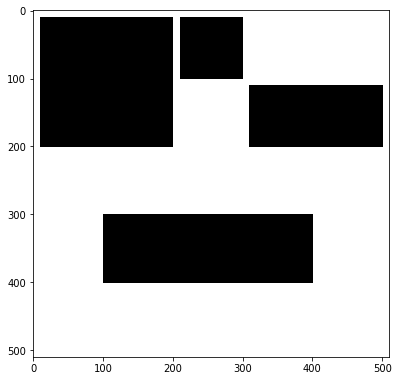

In [12]:
cv2.imshow("Image we'll be working with", work_image)

In [16]:
# Find Canny edges
edged = cv2.Canny(work_image, 30, 200)
#cv2.imshow('Canny Edges', edged)

In [17]:
# we use the edges to look for contours
# take note that cv2.findContours 
# actually changes the image we pass in.
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#cv2.imshow('Canny Edges After Contouring', edged)

In [18]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 4


Showing Image: All Contours


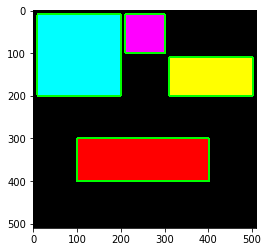

In [19]:
cv2.drawContours(image_data, contours, -1, (0,255,0), 3)
cv2.imshow('All Contours', image_data, (4,4))

Showing Image: Contour 0


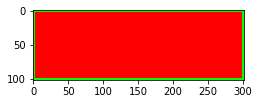

Showing Image: Contour 1


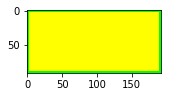

Showing Image: Contour 2


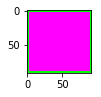

Showing Image: Contour 3


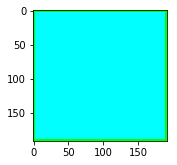

In [22]:
for (i,c)  in enumerate(contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    (x, y, w, h) = cv2.boundingRect(c)  
    
    cropped_contour = image_data[y:y + h, x:x + w]
    
    cv2.imshow("Contour {}".format(i), cropped_contour)